In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


# 경고 메세지 무시 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# 데이터 가져오기 
test = pd.read_csv('./Dataset/test.csv')
train= pd.read_csv('./Dataset/train.csv')
bus_bts =pd.read_csv('./Dataset/bus_bts.csv')


In [4]:
# 데이터 확인 
train.head() 

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             415423 non-null  int64  
 1   date           415423 non-null  object 
 2   bus_route_id   415423 non-null  int64  
 3   in_out         415423 non-null  object 
 4   station_code   415423 non-null  int64  
 5   station_name   415423 non-null  object 
 6   latitude       415423 non-null  float64
 7   longitude      415423 non-null  float64
 8   6~7_ride       415423 non-null  float64
 9   7~8_ride       415423 non-null  float64
 10  8~9_ride       415423 non-null  float64
 11  9~10_ride      415423 non-null  float64
 12  10~11_ride     415423 non-null  float64
 13  11~12_ride     415423 non-null  float64
 14  6~7_takeoff    415423 non-null  float64
 15  7~8_takeoff    415423 non-null  float64
 16  8~9_takeoff    415423 non-null  float64
 17  9~10_takeoff   415423 non-nul

In [6]:
train.describe()

,id,bus_route_id,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
count,415423.000000,4.154230e+05,4.154230e+05,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000,415423.000000
mean,207711.000000,2.691935e+07,4.209311e+04,33.420375,126.533574,0.305893,0.829699,0.815350,0.642475,0.599618,0.579393,0.112870,0.344870,0.516481,0.430922,0.408001,0.402874,1.242095
std,119922.434776,3.924652e+06,4.971504e+05,0.107996,0.140986,1.109766,2.255116,2.317561,1.959844,1.885941,1.942137,0.597714,1.279179,1.658850,1.485124,1.412839,1.446080,4.722287
min,0.000000,4.270000e+06,1.000000e+00,33.208350,126.165040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103855.500000,2.346000e+07,3.200000e+02,33.291080,126.475780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,207711.000000,2.803000e+07,1.130000e+03,33.478850,126.529770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,311566.500000,3.003000e+07,2.226000e+03,33.500020,126.575890,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,415422.000000,3.282000e+07,6.115101e+06,33.963640,126.965670,85.000000,94.000000,136.000000,78.000000,124.000000,99.000000,45.000000,66.000000,59.000000,65.000000,52.000000,81.000000,272.000000


In [7]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride'],
      dtype='object')

In [8]:
# test 데이터 확인
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# bus_bts 데이터확인
bus_bts.head() 

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [10]:
bus_bts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409414 entries, 0 to 2409413
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_card_id         float64
 1   bus_route_id         int64  
 2   vhc_id               int64  
 3   geton_date           object 
 4   geton_time           object 
 5   geton_station_code   int64  
 6   geton_station_name   object 
 7   getoff_date          object 
 8   getoff_time          object 
 9   getoff_station_code  float64
 10  getoff_station_name  object 
 11  user_category        int64  
 12  user_count           int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 239.0+ MB


* 출근 시간 승하차 인원과 퇴근 시간 승차자 인원의 상관관계
 (2시간 단위)

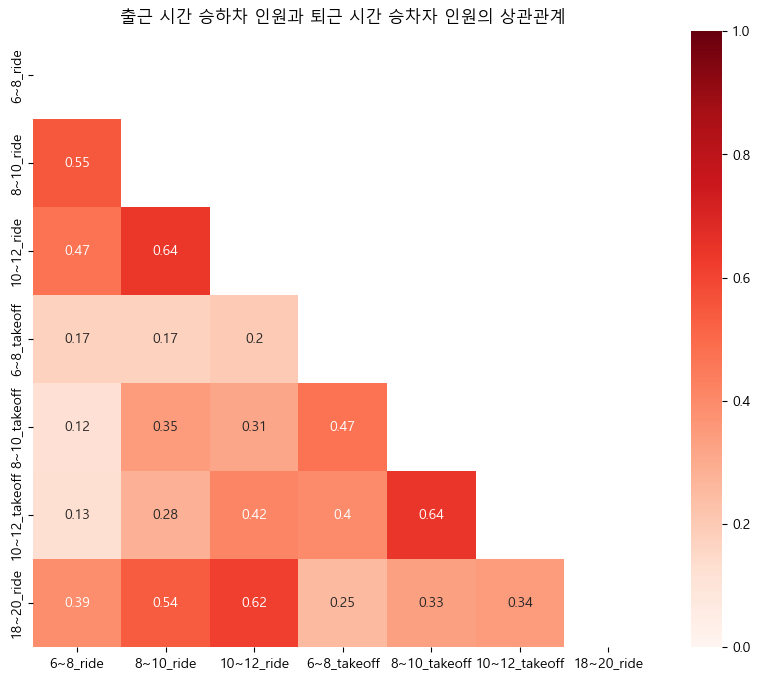

In [11]:
# 2시간 단위 
train['6~8_ride'] = train['6~7_ride']+ train['7~8_ride']
train['8~10_ride'] = train['8~9_ride'] + train['9~10_ride']
train['10~12_ride'] = train['10~11_ride'] + train['11~12_ride']
train['6~8_takeoff'] = train['6~7_takeoff'] + train['7~8_takeoff']
train['8~10_takeoff'] = train['8~9_takeoff'] + train['9~10_takeoff']
train['10~12_takeoff'] = train['10~11_takeoff'] + train['11~12_takeoff']

# 탑승 하차 dataframe 만들기 
train_ride_takeoff= train[['6~8_ride', '8~10_ride', '10~12_ride', '6~8_takeoff',
       '8~10_takeoff', '10~12_takeoff',
       '18~20_ride']]


# 삼각형 마스크 만들기 ( 위 삼각형 True , 아래 삼각형 False )
mask = np.zeros_like(train_ride_takeoff.corr(), dtype = np.bool)  # 0 행렬 
mask[np.triu_indices_from(mask)] = True # upper triangle 부분을 True 로 만듦 


plt.figure(figsize =(10,8) )
sns.heatmap(train_ride_takeoff.corr(), 
            annot= True,
            cmap = 'Reds',
            vmin =0,
            vmax =1, 
            mask = mask)

plt.title('출근 시간 승하차 인원과 퇴근 시간 승차자 인원의 상관관계')
plt.show()

--------

* 요일별 시내, 시외버스 출근승,하차량과 퇴근 승차량 추이 비교

In [12]:

# train 의 in_out 시내 0  시외 1 
train['in_out'].replace({'시내' : 0 , '시외' : 1}, inplace =True)

# train_sample 만들기
train_sample = train[['in_out' ,'date', '18~20_ride']]

# 6~12시 까지 탑승 인원 합 구해서 morining_ride 열 만들기 
a = train[['6~8_ride', '8~10_ride', '10~12_ride']]
train_sample['morning_ride'] =np.sum(a, axis=1) 
    
# 6~12시 까지 하차 인원 합구해서 morning_takeoff 열 만들기
b= train[['6~8_takeoff',  '8~10_takeoff', '10~12_takeoff']]
train_sample['morning_takeoff'] = np.sum(b, axis=1)

# date를 월~일(0~6)요일로 바꿔서 weekday열에 넣기  
train_sample['date'] =  pd.to_datetime(train_sample['date'])
train_sample['weekday'] = train_sample['date'].dt.weekday


# inout & weekday로 group
train_sample = train_sample.groupby(['in_out','weekday']).sum()


# train_sample 확인 
train_sample 

18~20_ride  morning_ride  morning_takeoff
in_out weekday                                           
0      0          101248.0      314448.0         180147.0
       1           84908.0      261776.0         151497.0
       2           86173.0      249718.0         142730.0
       3           72108.0      226223.0         133265.0
       4           57798.0      207497.0         123489.0
       5           46963.0      130022.0          80812.0
       6           52644.0      137957.0          86931.0
1      0            2825.0        7725.0           4378.0
       1            2312.0        6392.0           3566.0
       2            2231.0        6219.0           3338.0
       3            2014.0        5815.0           3061.0
       4            1653.0        5673.0           3110.0
       5            1456.0        3721.0           2001.0
       6            1662.0        3967.0           2260.0

* 시내버스 요일별 이용량

In [13]:
# 시내버스 요일별 이용량
# 시내버스(0) 만 
in_out_0 = train_sample.loc[0]

in_out_0

,18~20_ride,morning_ride,morning_takeoff
weekday,,,
0,101248.0,314448.0,180147.0
1,84908.0,261776.0,151497.0
2,86173.0,249718.0,142730.0
3,72108.0,226223.0,133265.0
4,57798.0,207497.0,123489.0
5,46963.0,130022.0,80812.0
6,52644.0,137957.0,86931.0


In [14]:
# groupby를 하니 weekday가 인덱스로 되어있음
# weekday를 x축으로 써야하니 컬럼으로 바꿈
t = in_out_0.unstack().reset_index()

# t 컬럼명 변경
t.columns = ['kind', 'weekday', 'count']

t

,kind,weekday,count
0,18~20_ride,0,101248.0
1,18~20_ride,1,84908.0
2,18~20_ride,2,86173.0
3,18~20_ride,3,72108.0
4,18~20_ride,4,57798.0
5,18~20_ride,5,46963.0
6,18~20_ride,6,52644.0
7,morning_ride,0,314448.0
8,morning_ride,1,261776.0
9,morning_ride,2,249718.0


In [15]:
# 월~일이 0~6으로 되어있어서 변경
t['weekday'].replace({0 : 'MON' , 1: 'TUE' ,2:'WED', 3:'THU', 4:'FRI', 5:'SAT' ,6:'SUN'}, inplace=True)

<AxesSubplot: title={'center': '9월달 요일별 시내버스 출근시간 승, 하차량 과 퇴근시간 탑승량'}, xlabel='weekday', ylabel='count'>

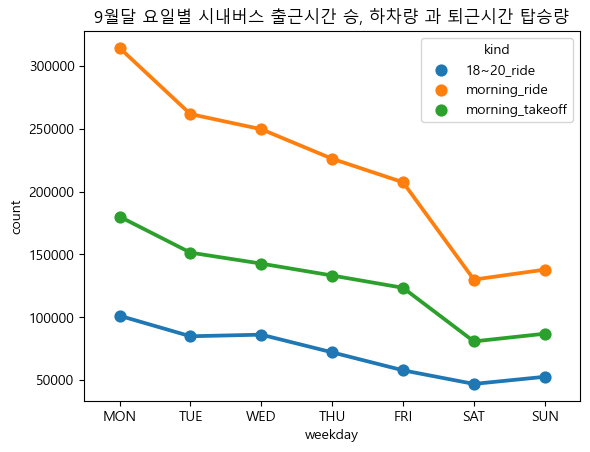

In [16]:
# plot 그리기 
plt.title('9월달 요일별 시내버스 출근시간 승, 하차량 과 퇴근시간 탑승량')
sns.pointplot(t, x='weekday', y='count', hue='kind')

* 시외버스 요일별 이용량 

In [17]:
# 시외버스(1) 만 
in_out_1 = train_sample.loc[1]


In [18]:
# groupby를 하니 weekday가 인덱스로 되어있음
# weekday를 x축으로 써야하니 컬럼으로 바꿈
t = in_out_1.unstack().reset_index()


t.columns = ['kind', 'weekday', 'count']

In [19]:
t['weekday'].replace({0 : 'MON' , 1: 'TUE' ,2:'WED', 3:'THU', 4:'FRI', 5:'SAT' ,6:'SUN'}, inplace=True)
t

,kind,weekday,count
0,18~20_ride,MON,2825.0
1,18~20_ride,TUE,2312.0
2,18~20_ride,WED,2231.0
3,18~20_ride,THU,2014.0
4,18~20_ride,FRI,1653.0
5,18~20_ride,SAT,1456.0
6,18~20_ride,SUN,1662.0
7,morning_ride,MON,7725.0
8,morning_ride,TUE,6392.0
9,morning_ride,WED,6219.0


<AxesSubplot: title={'center': '9월달 요일별 시외버스 출근시간 승, 하차량 과 퇴근시간 탑승량'}, xlabel='weekday', ylabel='count'>

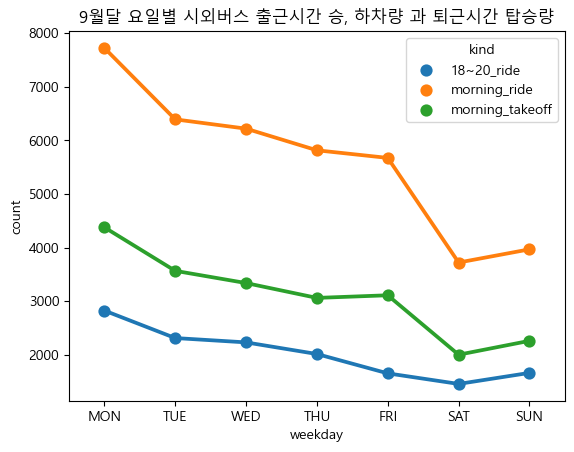

In [20]:
plt.title('9월달 요일별 시외버스 출근시간 승, 하차량 과 퇴근시간 탑승량')

sns.pointplot(t, x='weekday', y='count', hue='kind')

----------------------------------------------------------------------------

* 일별 출근시간 승, 하차 인원의 합, 일별 퇴근시간의 승차 인원 합 
* 가정 : 출근시간 승, 하차인원이 많으면 퇴근시간에 승차 인원이 많을 것이다 

In [21]:
# train 데이터에서 date열 과 18~20_ride 열 추출 후
# train_sample2 데이터프레임 만들기 
train_sample2 = train[['date', '18~20_ride']]

# 8~10 시 승차 인원 합을 8~10_ride 열 만들기
b= train[['8~9_ride', '9~10_ride']]
train_sample2['8~10_ride'] = b.sum(axis=1)

# 8~10 시 하차 인원 합을 8~10_takeoff 열 만들기 
a= train[['8~9_takeoff', '9~10_takeoff']]
train_sample2['8~10_takeoff'] = a.sum(axis=1)

# 컬럼의 순서 변경
train_sample2 = train_sample2[['date','8~10_ride', '8~10_takeoff', '18~20_ride']]

# 날짜로 grouping 
train_sample2 =train_sample2.groupby('date')

# 날짜별 (출근시간하차인원의 합)과 (퇴근시간 승차인원 합) 구하기 
train_sample2 = train_sample2.sum()
train_sample2

,8~10_ride,8~10_takeoff,18~20_ride
date,,,
2019-09-01,11957.0,7748.0,11537.0
2019-09-02,21844.0,13834.0,20561.0
2019-09-03,25756.0,16494.0,19743.0
2019-09-04,21472.0,13633.0,20133.0
2019-09-05,26331.0,17008.0,20392.0
2019-09-06,23455.0,15840.0,8162.0
2019-09-07,9420.0,5871.0,12389.0
2019-09-08,12118.0,7736.0,10306.0
2019-09-09,24206.0,15022.0,20135.0


In [22]:
a = train_sample2.unstack().reset_index()
a

,level_0,date,0
0,8~10_ride,2019-09-01,11957.0
1,8~10_ride,2019-09-02,21844.0
2,8~10_ride,2019-09-03,25756.0
3,8~10_ride,2019-09-04,21472.0
4,8~10_ride,2019-09-05,26331.0
...,...,...,...
85,18~20_ride,2019-09-26,21406.0
86,18~20_ride,2019-09-27,19198.0
87,18~20_ride,2019-09-28,14231.0
88,18~20_ride,2019-09-29,13332.0


In [23]:
# 컬럼명 변경
a.columns= ['kind', 'date', 'passenger_sum']

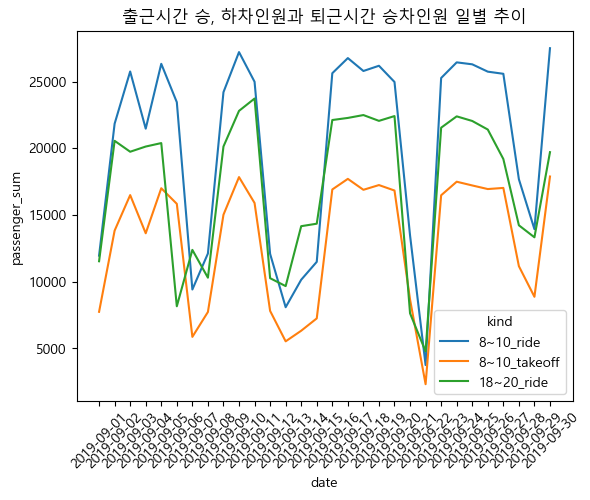

In [24]:
# plot 그리기 
plt.title('출근시간 승, 하차인원과 퇴근시간 승차인원 일별 추이')
plt.xticks(rotation=45) 
sns.lineplot(data =a, x='date', y='passenger_sum', hue='kind');

------------------

* 9월달 요일별 출근시간 승, 하차량 과 퇴근시간 탑승량 평균

In [25]:
# train 의 in_out 시내 0  시외 1 
train['in_out'].replace({'시내' : 0 , '시외' : 1}, inplace =True)

# train_sample 만들기
train_sample = train[['date', '18~20_ride']]

# 6~12시 까지 탑승 인원 합 구해서 morining_ride 열 만들기 
a = train[['6~8_ride', '8~10_ride', '10~12_ride']]
train_sample['morning_ride'] =np.sum(a, axis=1) 

# 6~12시 까지 하차 인원 합구해서 morning_takeoff 열 만들기
b= train[['6~8_takeoff',  '8~10_takeoff', '10~12_takeoff']]
train_sample['morning_takeoff'] = np.sum(b, axis=1)

# date를 월~일(0~6)요일로 바꿔서 weekday열에 넣기  
train_sample['date'] =  pd.to_datetime(train_sample['date'])
train_sample['weekday'] = train_sample['date'].dt.weekday

# inout & weekday로 group
train_sample = train_sample.groupby(['weekday']).mean()


# train_sample 확인 
train_sample 

,18~20_ride,morning_ride,morning_takeoff
weekday,,,
0,1.343710,4.159647,2.382443
1,1.375319,4.228579,2.445094
2,1.430856,4.142448,2.364172
3,1.256710,3.934114,2.311355
4,1.067439,3.827453,2.273077
5,1.062123,2.933797,1.816592
6,1.034282,2.703005,1.698682


In [26]:
t = train_sample.unstack().reset_index()

t.columns = ['kind', 'weekday', 'passenger_mean']

In [27]:
t['weekday'].replace({0 : 'MON' , 1: 'TUE' ,2:'WED', 3:'THU', 4:'FRI', 5:'SAT' ,6:'SUN'}, inplace=True)


<AxesSubplot: title={'center': '9월달 요일별 출근시간 승, 하차량 과 퇴근시간 탑승량 평균'}, xlabel='weekday', ylabel='passenger_mean'>

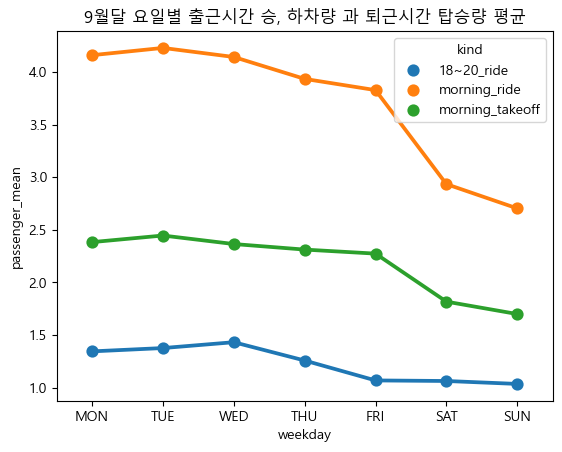

In [28]:
# plot 그리기 
plt.title('9월달 요일별 출근시간 승, 하차량 과 퇴근시간 탑승량 평균')
sns.pointplot(t, x='weekday', y='passenger_mean', hue='kind')